# Tarea 3 Numerico
Implementar la interpolación trigonométrica via tranformada discreta de Fourier y transformada rápida de Fourier.


Transformada discreta de Fourier

In [1]:
import numpy as np
from sympy import re, im, E, I, pi

In [2]:
# Paquetes para Grafica
from sympy import plot_parametric, symbols, Symbol, Matrix,cos, expand, sin, tan,exp
from sympy.plotting import plot
import sympy as sp
from sympy.plotting.plot import MatplotlibBackend, Plot

# Halla la transformada discreta de fourier con limites distintos a [-pi,pi]
def TDF(x0,f,n,li,lu):
  # Inicialmente la funcion interpoladora estara con variable z
  z = symbols('z')
  x = symbols('x')
  m = int(len(x0)/2)

  # Para poder trabajar con los limites ipuestos
  d = (lu-li)/(2*np.pi)
  e = (lu+li)/2

  # Transformar los puntos
  x0 = [(x0[i]-e)/d for i in range(0,len(x0))]
  y = [f.subs(x,d*x0[i]+e) for i in range(0,len(x0))]

  # Formacion de coeficientes y polinomio
  a = [sum(y[j]*np.cos(k*x0[j]) for j in range(0,2*m))/m for k in range(0,n+1)]
  b = [sum(y[j]*np.sin(k*x0[j]) for j in range(0,2*m))/m for k in range(0,n+1)]

  suma3 = sum(a[k]*cos(k*z) + b[k-1]*sin(z*(k-1)) for k in range(1,n))

  S = a[0]/2 + suma3 + a[n]*cos(n*z)

  # Sustituir por la funcion para volver a trabajar con variable x
  S = S.subs(z,(x-e)/d)

  # Grafica de las funciones
  plot1 = plot(S,(x,li,lu),show = False)
  plot2 = plot(f,(x,li,lu),show = False)
  plot1.extend(plot2)
  plot1.show()

  return print("La funcion interpoladora es\n", S)

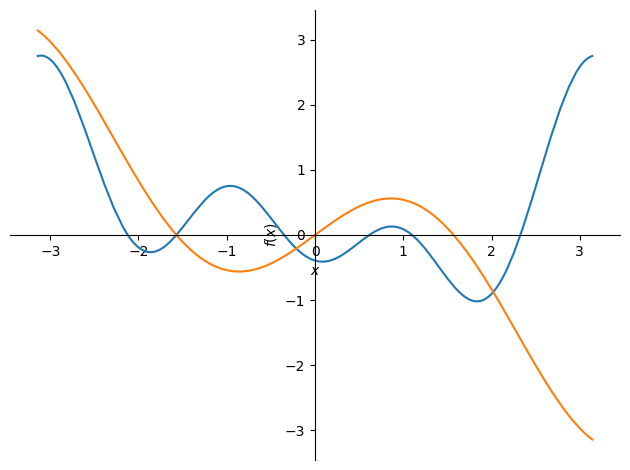

La funcion interpoladora es
 -0.392699081698724*sin(1.0*x) - 0.785398163397448*cos(1.0*x) + 0.785398163397448*cos(2.0*x) - 0.785398163397448*cos(3.0*x) + 0.392699081698724


In [4]:
# Definicion de variables
x = symbols('x')
z = symbols('z')
f2 = x*cos(x)
m = 4
x0 = [-np.pi + (j/m)*np.pi for j in range(0,2*m)]
# Llamado de la funcion
n = 3 # grado 3
TDF(x0,f2,n,-np.pi,np.pi)

Transformada rapida de fourier

In [8]:
x = symbols('x')
f4 = x*cos(x)
m = 4

# Generacion de puntos
x0 = [-np.pi+j*np.pi/m for j in range(0,2*m)]
y = [f4.subs(x,x0[i]) for i in range(0,len(x0))]

def FFT(m,f,y):
  p = int(np.log(m)/np.log(2))
  # Def vectores
  a = [0]*(m+1)
  b = [0]*(m)
  c = [I]*(2*m)
  ## Paso 1
  M = m
  q = p
  psi = E**(np.pi*I/m)

  # Paso 2
  c = y

  # Paso 3
  xi = [1]*(2*m+1)
  for j in range(1,M+1):
    xi[j] = psi**j
    xi[j+M] = -xi[j]

  # Paso 4
  K=0

  # Paso 5
  for l in range(1,p+1):
    # Paso 6
    while(K<2*m-1):
      # Paso 7
      for j in range(1,int(M)+1):
        # Paso 8
        x = bin(int(K))
        x = x[2:len(x)]
        ad = [int(x[len(x)-r]) for r in range(1,len(x)+1)]
        k = [0]*(p-len(ad)+1)
        k = k + ad
        K2 = int(sum(k[q+s]*(2**(p-s)) for s in range(0,p-q+1)))
        # Paso 9
        nu = c[int(K+M)]*xi[int(K2)]
        c[int(K+M)] = c[int(K)]-nu
        c[int(K)] = c[int(K)]+nu
        # Paso 10
        K=K+1
      # Paso 11
      K=K+M
    # Paso 12
    K=0
    M=M/2
    q = q-1
  # Paso 13
  while(K<2*m-1):
    # Paso 14
    x = bin(int(K))
    x = x[2:len(x)]
    ad = [int(x[len(x)-r]) for r in range(1,len(x)+1)]
    k = [0]*(p-len(ad)+1)
    k = k + ad
    j = int(sum(k[g]*(2**(p-g)) for g in range(0,p+1)))
    # Paso 15
    if j>int(K):
      t = c[j]
      c[j]= c[int(K)]
      c[int(K)] = t
    # Paso 16
    K=K+1
  #\Paso 17
  a[0] = re(c[0])/m
  a[m] = re(E**(-I*np.pi*m)*c[m]/m)

  # Paso 18
  for j in range(1,m):
    a[j] = re(E**(-I*np.pi*j)*c[j]/m)
    b[j] = im(E**(-I*np.pi*j)*c[j]/m)
  # Paso 19
  return (c,a,b)

# Coeficientes:
(c,a,b) = FFT(m,f4,y)

In [9]:
## Suma para calcular la transformada:
suma3 = sum(a[k]*cos(k*x) + b[k]*sin(x*k) for k in range(1,m))
S = a[0]/2 + suma3/m + a[m]*cos(m*x)/2
S


-0.0694200459087245*sin(x) + 4.80917673430447e-17*sin(2*x) + 0.0694200459087244*sin(3*x) - 0.0694200459087245*cos(x) + 0.196349540849362*cos(2*x) - 0.0694200459087245*cos(3*x) + 0.392699081698724*cos(4*x) + 0.392699081698724

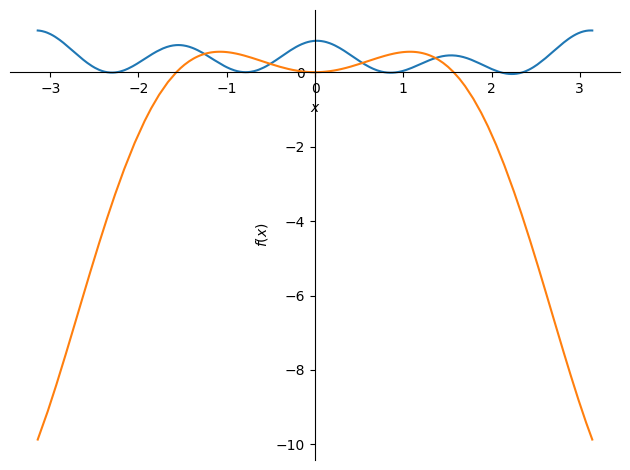

In [10]:
# Graficando
plot1 = plot(S,(x,-np.pi,np.pi),show = False)
plot2 = plot(x**2*cos(x),(x,-np.pi,np.pi),show = False)
plot1.extend(plot2)
plot1.show()